In [1]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D, Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [2]:
model_dense=DenseNet169(weights='imagenet',include_top=False, input_shape=(32, 32, 3)) 

x = model_dense.output

x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
#x = Dropout(0.5)(x)
x = Dense(1024,activation='relu')(x) 
x = Dense(512,activation='relu')(x) 
x = BatchNormalization()(x)
#x = Dropout(0.5)(x)

preds=Dense(108,activation='softmax')(x) #FC-layer

In [3]:
model=Model(inputs=model_dense.input,outputs=preds)
#model.summary()

In [4]:
for layer in model.layers[:-30]:
    layer.trainable=False
    
for layer in model.layers[-30:]:
    layer.trainable=True

In [5]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.summary()

In [6]:
#training data directory and parameteres
trainDataGen = ImageDataGenerator(
                    rotation_range = 5,
                    width_shift_range = 0.1,
                    height_shift_range = 0.1,
                    rescale = 1.0/255,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = False,
                    fill_mode = 'nearest',
                )

testDataGen = ImageDataGenerator(rescale=1.0/255,)


train_gen = trainDataGen.flow_from_directory(
                    "data/Train",
                    target_size=(32, 32),
                    class_mode="categorical",
                    batch_size=32
                    )


Found 214603 images belonging to 108 classes.


In [7]:
#validation data directory and parameteres
val_gen = testDataGen.flow_from_directory(
                    "data/Test",
                    target_size=(32, 32),
                    class_mode="categorical",
                    batch_size=32
                    )


Found 32400 images belonging to 108 classes.


In [8]:
#if no change in validation loss - learning rate will be decreased
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

In [9]:
densenet169 = model.fit(
        train_gen,
        epochs = 20,
        steps_per_epoch = 6706,
        validation_data = val_gen,
        validation_steps = 1013
        )

Epoch 1/20
6706/6706 [==============================] - 505s 75ms/step - loss: 1.4436 - accuracy: 0.5519 - val_loss: 0.9876 - val_accuracy: 0.6695s - loss: 1.444
Epoch 2/20
6706/6706 [==============================] - 325s 49ms/step - loss: 1.0761 - accuracy: 0.6467 - val_loss: 0.9546 - val_accuracy: 0.6841
Epoch 3/20
6706/6706 [==============================] - 324s 48ms/step - loss: 0.9657 - accuracy: 0.6766 - val_loss: 0.8269 - val_accuracy: 0.7170
Epoch 4/20
6706/6706 [==============================] - 332s 50ms/step - loss: 0.9082 - accuracy: 0.6924 - val_loss: 0.7875 - val_accuracy: 0.7271
Epoch 5/20
6706/6706 [==============================] - 320s 48ms/step - loss: 0.8667 - accuracy: 0.7050 - val_loss: 0.7818 - val_accuracy: 0.7297
Epoch 6/20
6706/6706 [==============================] - 314s 47ms/step - loss: 0.8342 - accuracy: 0.7128 - val_loss: 0.7354 - val_accuracy: 0.7426
Epoch 7/20
6706/6706 [==============================] - 315s 47ms/step - loss: 0.8159 - accuracy: 0.718

In [10]:
model.save("DenseNetModel.h5")

In [11]:
%matplotlib inline
accu=densenet169.history['accuracy']
val_acc=densenet169.history['val_accuracy']
loss=densenet169.history['loss']
val_loss=densenet169.history['val_loss']

epochs=range(len(accu)) #No. of epochs



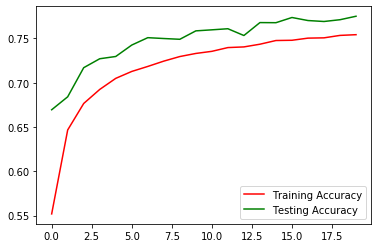

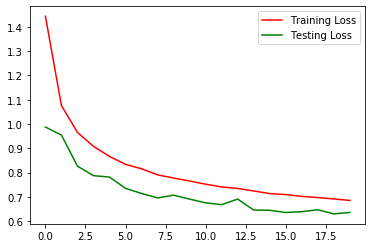

In [12]:
import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')

plt.savefig('training_den169_mix.png')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')

plt.savefig('loss_den169_mix.png')
plt.legend()
plt.show()

